<a href="https://colab.research.google.com/github/wallacecarlis/data_science/blob/main/PROJETO_5_CLASSIFICACAO_CHURN_PREDICTION_TELECOM_REDE_NEURAL_RANDOM_FOREST_REGRESSAO_LOGISTICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

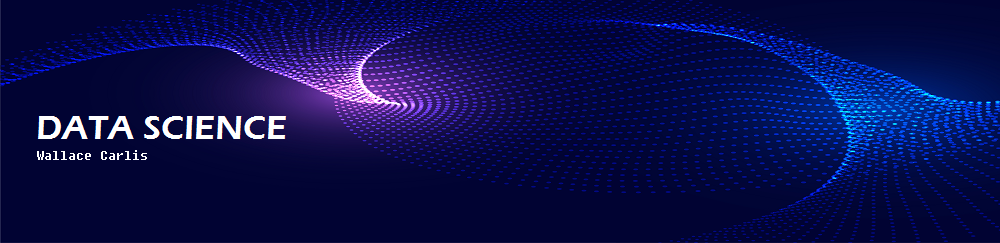

# **Projeto 5 - Classificação de Churn Prediction em Telecom - Rede Neural, Random Forest e Regressão Logística**

#### **Churn** é uma métrica que indica o quanto uma empresa perde de receita ou clientes, e está intimamente ligada à **insatisfação** destes com a prestação de serviços. Sua fórmula é simples, basta dividir a **quantidade perdida de clientes** em determinado período pelo **total de clientes que o iniciaram**. Por exemplo, imaginemos que uma empresa tenha perdido 100 clientes de 1000, seu **churn** foi de 10%.

#### Um exemplo prático de **churn** é a **taxa de cancelamento de assinaturas** de serviços digitais como **Netflix, Spotify, Deezer**, dentre outros. Podemos ainda expandir a compreensão dos cancelamentos de consumo dos serviços para faculdades, bancos e obviamente **telefonia**, que será a análise deste projeto.



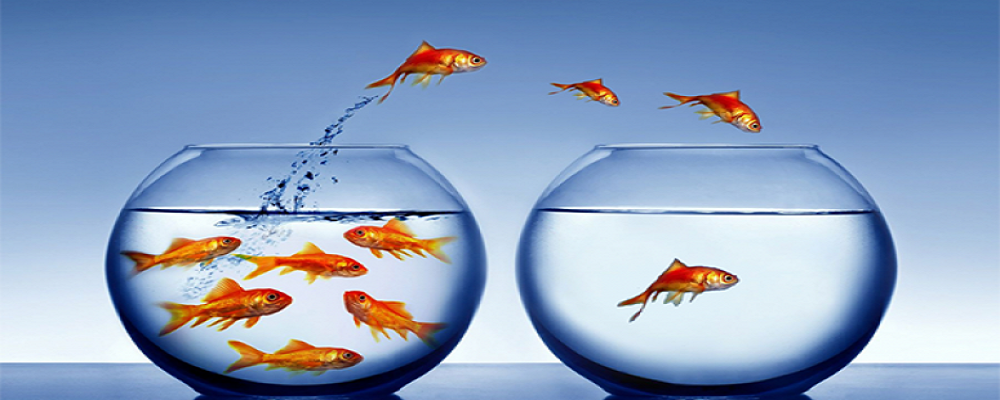

#### Como negócio, é fundamental que se entenda o porquê do abandono de parte de seus clientes da empresa para a **concorrência**, já que a compreensão do processo pode apontar para a **mitigação desses efeitos** e a retomada do crescimento no mercado.

#### Retenções em ações direcionadas identificando **potenciais cancelamentos** são primordiais no processo, onde o **custo de aquisição de cliente** (CAC) é normalmente **mais alto** que o custo para **mantê-lo**.

#### Uma das soluções mais eficientes oferecidas pelo no momento é o **Churn Prediction**, ou seja, a **previsão do abandono** de um serviço pelo cliente. Essa aplicação é realizada por meio de **machine learning**, método de análise de dados históricos e que faz uso **automatizado de algoritmos** que aprendem interativamente e encontram **insights**, a partir da análise da rotatividade da base de usuários propensos a desistir do que lhe é oferecido no momento.

#### Neste projeto inicialmente vamos analisar o quanto nossos modelos podem responder de forma assertiva aos resultados de **Churn** da empresa, ou seja, o quanto de fato acertam em suas previsões sobre os **cliente desistentes**. Utilizaremos a métrica **recall** para a medição de desempenho do nosso modelo.

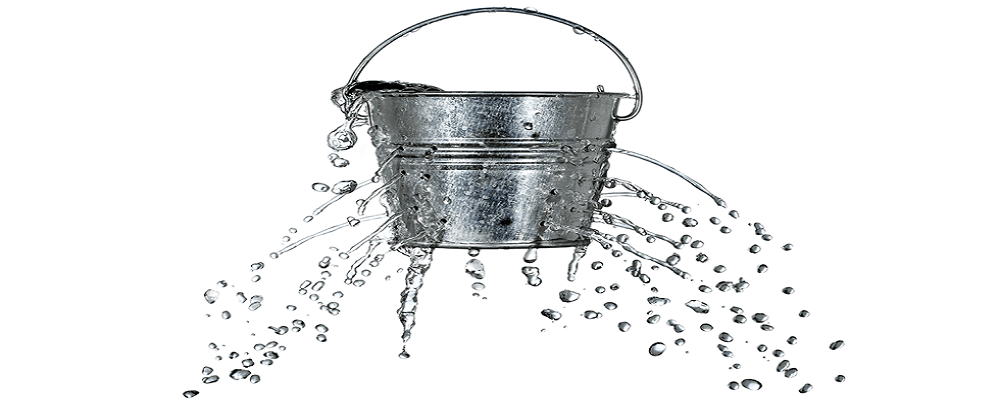

#### Os dados utilizados neste projeto foram originalmente disponibilizados na plataforma de ensino da [IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O dataset completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv). Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem certo entendimento a **respeito do problema**. Iniciaremos com as importações das bibliotecas necessárias para nossa **análise de dados** e construção dos modelo de **machine learning**.

In [149]:
# 1 - Importando as bibliotecas

# Análise de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "svg"
plt.rcParams["font.family"] = "sans-serif"

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline

# Padronização, balanceamento e tratamentos
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, KFold

# Treino e teste
from sklearn.model_selection import train_test_split

# Métricas e Visualização
from sklearn.metrics import confusion_matrix, classification_report

# Classificadores - Algoritmos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Otimização dos hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Tratamento de warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#### Após a importação das bibliotecas, iremos acessar a base de dados e verificar as principais informações. Esta é a fase de análise exploratória dos dados - **EDA**.

In [150]:
# 2 - Acessando a base de dados
arquivo = "https://raw.githubusercontent.com/wallacecarlis/arquivos_ml/refs/heads/main/Churn_Prediction_Telecom.csv"
df = pd.read_csv(arquivo)

#### Como boa prática iremos verificar a quantidade de linhas e colunas da base de dados, bem como os tipos de dados, nomes das colunas, se existem valores ausentes, além de visualizarmos as primeiras e últimas linhas. Faremos isso com a propriedade **shape** e os métodos **info, head e tail**, respectivamente.

In [151]:
# 3 - Verificando a quantidade de linhas e colunas
df.shape

(7043, 21)

In [152]:
# 4 - Verificando os tipos dos dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [153]:
# 5 - Visualizando as primeiras linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [154]:
# 6 - Visualizando as últimas linhas
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### Após o **EDA** inicial verificou-se que:

* Aparentemente **não há** valores nulos;

* Os **tipos de dados** da maioria das colunas são **categóricos** (object), incluindo a **variável alvo** da análise (**churn**). Outras colunas estão com os tipos **float** ou **int**, como a coluna **SeniorCitizen**. Como no mundo real geralmente não ocorrem bases sem **valores nulos**, certamente uma verificação mais aprofundada nos levará a optar a processar algumas transformações;

* Sobre as **características** dos dados nas colunas percebe-se que são:
  * **Clientes que saíram** no último mês, com **Yes** ou **No** - coluna **churn**;
  * **Serviços** que cada cliente assinou - telefone, linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico e streaming de TV e filmes;
  * **Informações da conta** do cliente - há quanto tempo ele é cliente, contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais;
  * **Informações demográficas** sobre o cliente - sexo, faixa etária e se eles têm parceiros e dependentes.
  * **customerID** não traz nenhum significado em si, é apenas um identificador do cliente;
  * **SeniorCitizen** apresenta valores binários, 0 e 1;
  * **tenure** traz valores inteiros;
  * **MonthlyCharges** traz valores decimais;
  * **TotalCharges** apesar de também apresentar valores decimais, está com o tipo de dados como **object**, como já visualizado com a função **info()**.




#### Podemos melhorar ainda mais nossa compreensão com o método **describe()** sobre as colunas **numéricas**.

In [155]:
# 7 - Verificando o resumo estatístico
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Conforme percebido acima no resumo estatístico, a coluna **TotalCharges** não foi incluída no método, o que reforça a informação sobre a necessidade de **transformação** no seu tipo de dado. Outra informação que pode ser verificada é sobre a coluna **SeniorCitizen** e seus valores **binários**. Vamos visualizar a quantidade de cada valor dessa coluna.

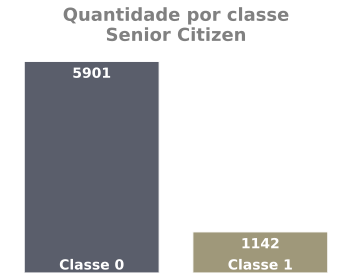

In [156]:
# 8 - Confirmando a quantidade de cada valor na coluna Senior Citizen
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (5, 4))
barras = sns.countplot(x = "SeniorCitizen", data = df, ax = ax,
                       palette = "cividis", hue = "SeniorCitizen", legend = False)

ax.set_title("Quantidade por classe\nSenior Citizen", color = "grey",
             fontsize = 18, fontweight = "bold", pad = 10)

for i in barras.patches:
  ax.annotate(int(i.get_height()),
              xy = (i.get_x() + (i.get_width() / 2),
                    i.get_height() - (i.get_width() * 200)),
                    color = "white", fontweight = "bold",
                    ha = "center", va = "top",
                    fontsize = 14)

for i, (nome, valor) in enumerate(zip(df.SeniorCitizen.value_counts().index,
                                     df.SeniorCitizen.value_counts().values)):
  ax.text(i, valor - valor + 200, f"Classe {nome}", ha = "center", color = "white",
          fontsize = 14, fontweight = "bold", va = "center")

ax.axis("off")
plt.tight_layout()

#### Visualizações de dados categóricos também são relevantes para a análise como nas colunas de **gênero, método de pagamento e contrato**.

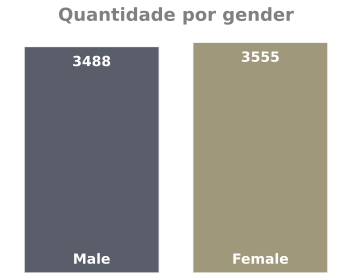

In [157]:
# 9 - Confirmando a quantidade de cada valor na coluna gender
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (5, 4))
barras = sns.countplot(x = "gender", data = df, ax = ax,
                       palette = "cividis", hue = "gender", legend = False)

ax.set_title("Quantidade por gender", color = "grey",
             fontsize = 18, fontweight = "bold", pad = 10)

for i in barras.patches:
  ax.annotate(int(i.get_height()),
              xy = (i.get_x() + (i.get_width() / 2),
                    i.get_height() - (i.get_width() * 170)),
                    color = "white", fontweight = "bold",
                    ha = "center", va = "top",
                    fontsize = 14)

for i, (nome, valor) in enumerate(zip(df.gender.value_counts().index,
                                      df.gender.value_counts().values)):
  ax.text(i, valor - valor + 200, nome, ha = "center", color = "white",
          fontsize = 14, fontweight = "bold", va = "center")

ax.axis("off")
plt.tight_layout()

#### Como verificado acima, clientes **femininos e masculinos** têm praticamente a **mesma representatividade** na base de dados.Vamos verificar como estão divididos os **métodos de pagamento**.

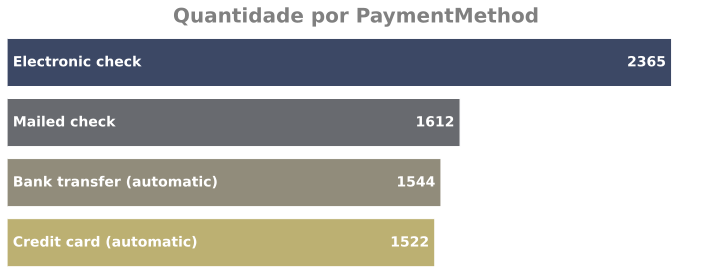

In [158]:
# 10 - Confirmando a quantidade de cada valor na coluna Payment Method
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (10, 4))
barras = sns.countplot(y = "PaymentMethod", data = df, ax = ax, order = df.PaymentMethod.value_counts().index,
                       palette = "cividis", hue = "PaymentMethod", legend = False)

ax.set_title("Quantidade por PaymentMethod", color = "grey",
             fontsize = 20, fontweight = "bold", pad = 10)

for i, (nome, valor) in enumerate(zip(df.PaymentMethod.value_counts().index,
                                      df.PaymentMethod.value_counts().values)):
  ax.text(valor - valor + 20, i, nome, ha = "left", color = "white",
          fontsize = 14, fontweight = "bold", va = "center")
  ax.text(valor - 20, i, valor, ha = "right", color = "white",
          fontsize = 14, fontweight = "bold", va = "center")

ax.axis("off")
plt.tight_layout()

#### Como observado, o principal método de pagamento pelos clientes é o **Eletronic check**, bem a frente dos demais. Outra visualização interessante será a do **tipo de contrato** de prestação de serviços, que são divididos em três categorias: **mensal**, **anual** e **bienal**.



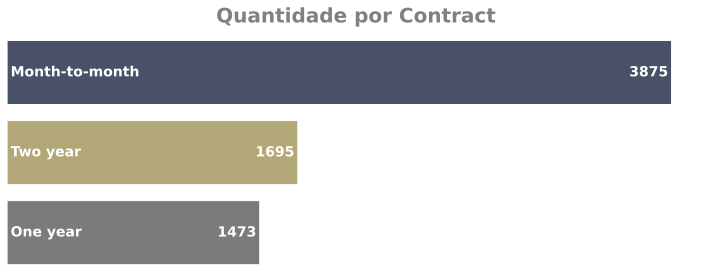

In [159]:
# 11 - Confirmando a quantidade de cada valor na coluna Contract
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (10, 4))
barras = sns.countplot(y = "Contract", data = df, ax = ax, order = df.Contract.value_counts().index,
                       palette = "cividis", hue = "Contract", legend = False)

ax.set_title("Quantidade por Contract", color = "grey",
             fontsize = 20, fontweight = "bold", pad = 10)

for i, (nome, valor) in enumerate(zip(df.Contract.value_counts().index,
                                      df.Contract.value_counts().values)):
  ax.text(valor - valor + 20, i, nome, ha = "left", color = "white",
          fontsize = 14, fontweight = "bold", va = "center")
  ax.text(valor - 20, i, valor, ha = "right", color = "white",
          fontsize = 14, fontweight = "bold", va = "center")

ax.axis("off")
plt.tight_layout()

#### Podemos observar que o contrato **Month-to-month** é o preferido pelos clientes desta empresa, e uma vez que visualizamos algumas informações relevantes podemos iniciar as transformações necessárias, contudo, o ideal será gerarmos uma cópia para tais transformações. Utilizaremos o método **copy()**.

In [160]:
# 12 - Gerando uma cópia da base de dados
df_clean = df.copy()

#### Com a cópia providenciada já podemos iniciar as transformações necessárias, e começaremos com a coluna **TotalCharges**, uma vez que o tipo de dado está incorreto. Transformaremos de **object** para **float**. Em seguida, confirmaremos as transformações realizadas.

In [161]:
# 13 - Criando uma nova coluna para receber valores do tipo "float"
df_clean["TotalCharges"] = pd.to_numeric(df_clean.iloc[:, 19], errors = "coerce")
df_clean["TotalCharges"].isnull().sum()

11

#### Percebemos que mesmo com a visualização do método **info()** no início desta análise nos indicando de que **não havia valores nulos**, acabamos encontrando alguns após o processo de transformação na coluna **TotalCharges** ao utilizar os métodos **isnull** e **sum**. Tal observação é fundamental para a correção da base de dados antes de iniciar a contrução do modelo de **machine learning**. Vamos **imputar** valores **medianos** da própria coluna. Utilizaremos a classe **SimpleImputer()**.

In [162]:
# 14 - Inserindo valores medianos aos valores ausentes na coluna Total Charges, e transformando-os em float
valores_medianos = SimpleImputer(missing_values = np.nan, strategy = "median")
df_clean["TotalCharges"] = valores_medianos.fit_transform(df_clean.iloc[:, 19].values.reshape(-1, 1)).astype(float)

#### Após a correção vamos verificar se ainda existem **valores nulos**.

In [163]:
# 15 - Verificando se existem valores nulos
df_clean["TotalCharges"].isnull().sum()

0

#### Uma vez que não temos mais **valores nulos** na base de dados, vale a pena passar novamente pelo resumo estatístico, já que deveremos ter agora quatro colunas **numéricas**.

In [164]:
# 16 - Verificando novamente o resumo estatístico após os tratamentos
df_clean.describe().round(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7043.0,7043.0
mean,0.2,32.4,64.8,2281.9
std,0.4,24.6,30.1,2265.3
min,0.0,0.0,18.2,18.8
25%,0.0,9.0,35.5,402.2
50%,0.0,29.0,70.4,1397.5
75%,0.0,55.0,89.8,3786.6
max,1.0,72.0,118.8,8684.8


#### Podemos observar que na coluna **TotalCharges** a **média** de valores ficou bem distante da **mediana (50%)**, e com um alto **desvio padrão (std)**. Pode ser que haja **outliers** interferindo na métrica. Vamos plotar um gráfico do tipo **boxplot** para visualizar tais dados.

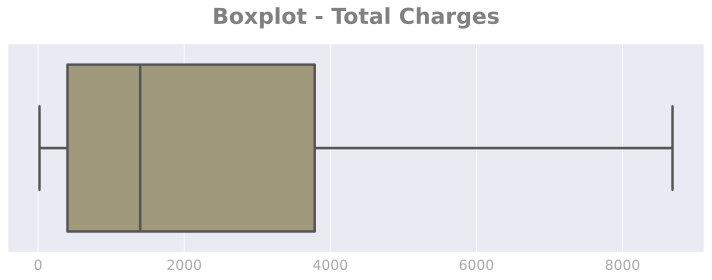

In [165]:
# 17 - Visualizando o boxplot da coluna Total Charges
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 4))
ax = sns.boxplot(x = df_clean["TotalCharges"], orient = "h", linewidth = 2.5, color = "#A69D75")
ax.set_title("Boxplot - Total Charges", fontsize = 22, color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
plt.tight_layout()

#### Com relação à visualização acima podemos perceber que existem **valores máximos** bem distantes da maioria da distribuição, ou seja, valores superiores a **8000**, enquanto a maior parte dos dados está distribuída até **4000**. Isso ajuda a explicar a diferença, por exemplo, entre os valores de **média** e **mediana** para a coluna **TotalCharges**.

#### Vamos também analisar a coluna **MonthlyCharges** para compararmos seus valores estatísticos.

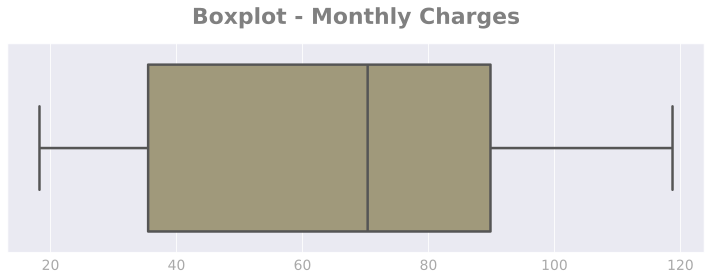

In [166]:
# 18 - Visualizando o boxplot da coluna Total Charges
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 4))
ax = sns.boxplot(x = df_clean["MonthlyCharges"], orient = "h", linewidth = 2.5, color = "#A69D75")
ax.set_title("Boxplot - Monthly Charges", fontsize = 22, color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
plt.tight_layout()

#### Percebemos claramente acima que neste caso os valores de **média** e **mediana** se aproximam, com respectivamente, **64.76 e 70.35**. Seguindo com as análises, antes de entrarmos na construção de nosso modelos de **machine learning**, vamos observar as informações da **variável alvo**, a coluna **Churn**. Visualizaremos a quantidade de clientes que **cancelaram** seus serviços, bem como teremos a compreensão do **desbalanceamento** dos dados, pela diferença na quantidade dos clientes que realizam o cancelamento, e os que não realizam.

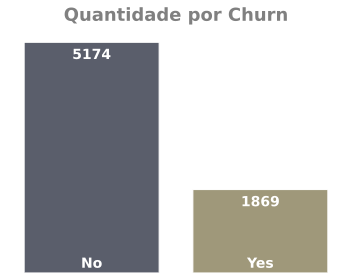

In [167]:
# 19 - Visualizando a quantidade de Churn
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (5, 4))
barras = sns.countplot(x = "Churn", data = df_clean, ax = ax,
                       palette = "cividis", hue = "Churn", legend = False)

ax.set_title("Quantidade por Churn", color = "grey",
             fontsize = 18, fontweight = "bold", pad = 10)

for i in barras.patches:
  ax.annotate(int(i.get_height()),
              xy = (i.get_x() + (i.get_width() / 2),
                    i.get_height() - (i.get_width() * 170)),
                    color = "white", fontweight = "bold",
                    ha = "center", va = "top",
                    fontsize = 14)

for i, (nome, valor) in enumerate(zip(df_clean.Churn.value_counts().index,
                                      df_clean.Churn.value_counts().values)):
  ax.text(i, valor - valor + 200, nome, ha = "center", color = "white",
          fontsize = 14, fontweight = "bold", va = "center")

ax.axis("off")
plt.tight_layout()

### No caso acima, percebemos nitidamente o **desbalanceamento das classes**, ou seja, a grande quantidade de clientes ainda permanece na base. Teremos que corrigir esta questão mais à frente.

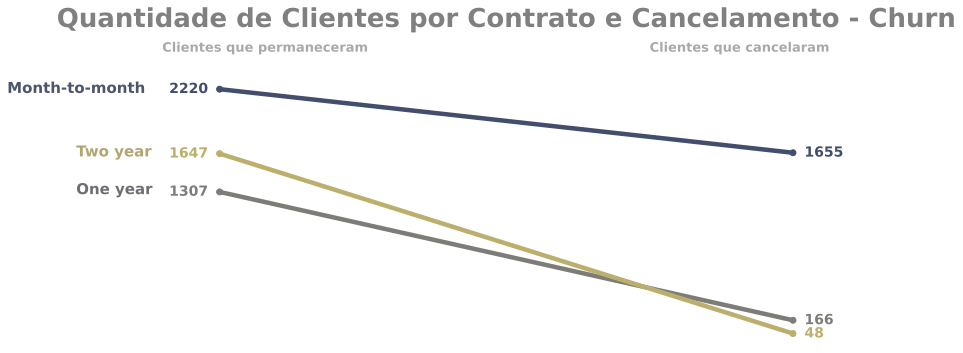

In [168]:
# 20 - Visualizando a quantidade de clientes por contrato e cancelamento

#Configurando a base de dados
df_melted = df.groupby(["Churn", "Contract"]).size().reset_index(name = "Clientes")

# Definindo a estrutura e paleta
sns.set_style("white")
fig, ax = plt.subplots(figsize = (12, 5), dpi = 200)
colors = sns.color_palette("cividis", n_colors = len(df_melted["Contract"].unique()))

# Plotando a linha de inclinação
for i, contract in enumerate(df_melted["Contract"].unique()):
    valores = df_melted[df_melted["Contract"] == contract]["Clientes"].values
    ax.plot([0, 1], valores, marker = "o", color = colors[i], label = contract, linewidth = 4.5)

# Plotando título e anotações
ax.set_title("Quantidade de Clientes por Contrato e Cancelamento - Churn", color = "grey",
             fontsize = 26, fontweight = "bold", pad = 50, ha = "center")

ax.text(-0.1, df_melted["Clientes"].max() * 1.15, "Clientes que permaneceram",
        color = "darkgrey", fontsize = 13, fontweight = "semibold")

ax.text(0.75, df_melted["Clientes"].max() * 1.15, "Clientes que cancelaram",
        color = "darkgrey", fontsize = 13, fontweight = "semibold")

# Plotando as informações da legenda
df_filtered = df_melted[df_melted['Churn'] == 'No']
primeiros = df_filtered.groupby('Contract')['Clientes'].nlargest(1).reset_index()

ax.text(-0.25, primeiros.Clientes[0] * .985, primeiros.Contract[0], color = "#4c556c",
        fontsize = 15, fontweight = "semibold", ha = "center")

ax.text(-0.25, primeiros.Clientes[2] * .985, primeiros.Contract[2], color = "#b1a570",
        fontsize = 15, fontweight = "semibold", ha = "left")

ax.text(-0.25, primeiros.Clientes[1] * .985, primeiros.Contract[1], color = "#6c6e72",
        fontsize = 15, fontweight = "semibold", ha = "left")

# Plotando os valores
for i, contrato in enumerate(df_melted["Contract"].unique()):
    valores = df_melted[df_melted["Contract"] == contrato]["Clientes"].values
    ax.text(-0.02, valores[0], f"{valores[0]}", va = "center", ha = "right",
            fontsize = 14, color = colors[i], fontweight = "bold")
    ax.text(1.02, valores[1], f"{valores[1]}", va = "center", ha = "left",
            fontsize = 14, color = colors[i], fontweight = "bold")

ax.axis("off")
plt.tight_layout()
#plt.savefig("QTD_CHURN.jpeg", bbox_inches = "tight")

#### Com o gráfico de inclinação acima, podemos observar que no tipo de contrato **mensal** o volume de cancelamentos é nitidamente **superior** aos demais. Ou seja, cliente que assina por **períodos maiores**, geralmente **não têm a tendência do churn**.

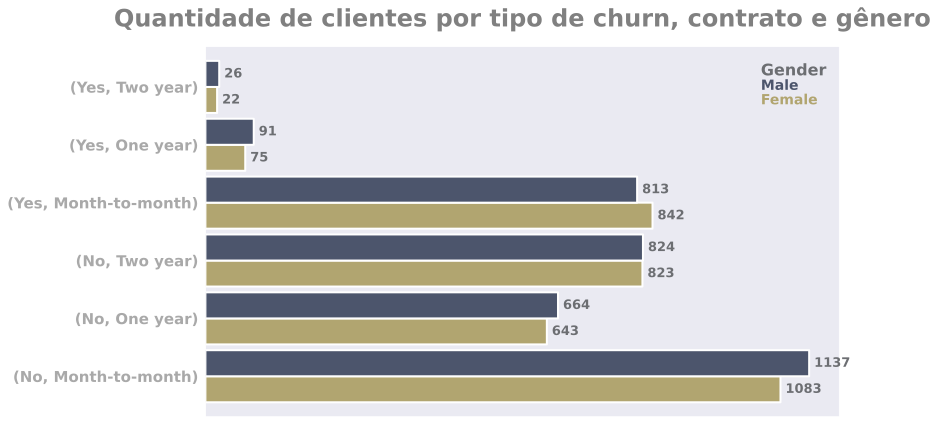

In [169]:
# 21 - Visualizando a quantidade de clientes por churn, contrato e gênero
ccg = df.groupby(["Churn", "Contract", "gender"]).size().unstack()

sns.set_style("dark")
fig, ax = plt.subplots(figsize = (12, 6))
colors = {"Male": "#4c556c", "Female": "#b1a570"}
barras = ccg.plot(kind =
                  "barh", ax = ax,
                  color=[colors[col] for col in df['gender'].unique()],
                  width = 0.9,
                  linewidth = 2)

for i in barras.containers:
    ax.bar_label(i, fmt = "%.0f", padding = 5, fontsize = 13, color = "#6c6e72", fontweight = "bold")

ax.set_title("Quantidade de clientes por tipo de churn, contrato e gênero", fontsize = 24,
             fontweight = "bold", color = "grey", pad = 20)

ax.set_yticklabels([i.get_text() for i in ax.get_yticklabels()], fontweight="bold")
ax.tick_params(axis = "y", labelsize = 15, colors = "darkgrey")
ax.set_ylabel("")

ax.text(ccg.Male[0] * .92, 5.2, "Gender", color = "#6c6e72", fontsize = 16, fontweight = "semibold")
ax.text(ccg.Male[0] * .92, 4.95, "Male", color = "#4c556c", fontsize = 14, fontweight = "semibold")
ax.text(ccg.Male[0] * .92, 4.7, "Female", color = "#b1a570", fontsize = 14, fontweight = "semibold")

ax.legend().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.tight_layout()

#### Quando verificamos o **gênero** relacionados tanto a **permanência** quanto ao **cancelamento**, os números são **praticamente similares**. Finalizando o processo de visualizações vamos verificar algumas **distribuições**.

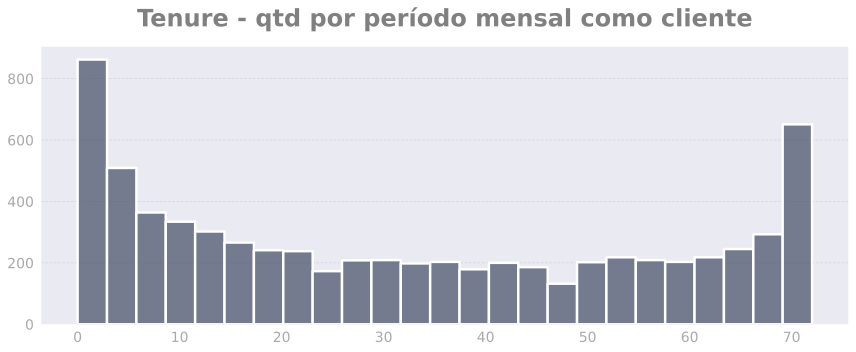

In [170]:
# 22 - Visualização da distribuição da coluna tenure
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (12, 5))
bins = 25
ax = sns.histplot(df_clean.tenure, lw = 5, bins = bins, color = "#4c556c")
ax.set_title("Tenure - qtd por período mensal como cliente", fontsize = 24,
             color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.tick_params(axis = "y", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(True, axis = "y", linestyle = "--", color = "darkgrey", alpha = 0.3)
plt.tight_layout()

#### Há uma grande concentração de clientes nos **primeiros meses**, e também uma boa quantidade nos **meses finais**. Há uma certa estabilização de clientes entre **20 e 60 meses**.

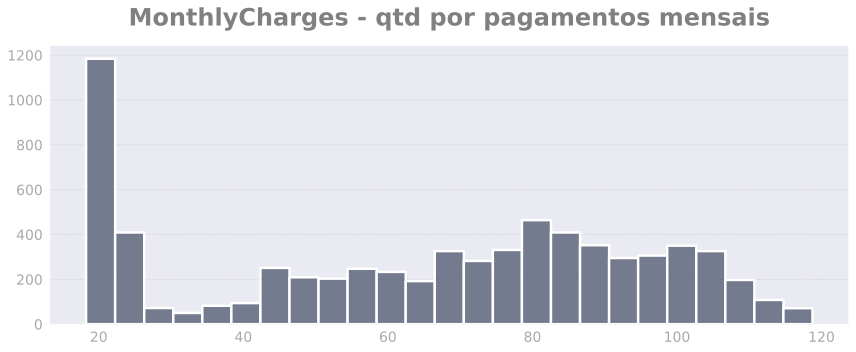

In [171]:
# 23 - Visualização da distribuição da coluna Monthly Charges
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (12, 5))
bins = 25
ax = sns.histplot(df_clean.MonthlyCharges, lw = 5, bins = bins, color = "#4c556c")
ax.set_title("MonthlyCharges - qtd por pagamentos mensais", fontsize = 24,
             color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.tick_params(axis = "y", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(True, axis = "y", linestyle = "--", color = "darkgrey", alpha = 0.3)
plt.tight_layout()

#### A maior quantidade de clientes paga valores de sua assinatura próximo a **20**. Uma quantidade interessante de clientes está na faixa de valores **superiores a 40 e abaixo de 110**.

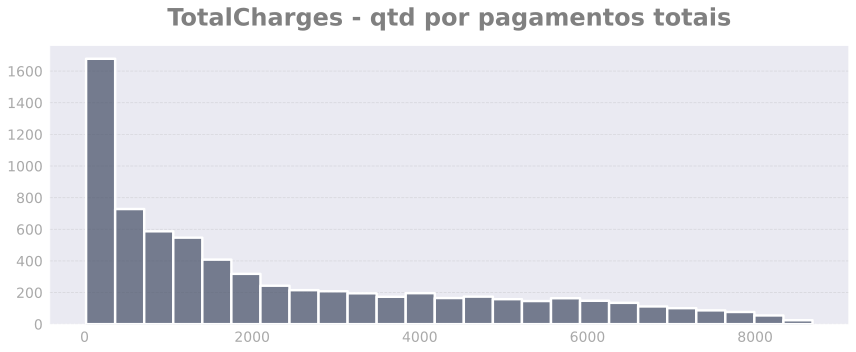

In [172]:
# 24 - Visualização da distribuição da coluna Total Charges
sns.set_style("dark")
fig, ax = plt.subplots(figsize = (12, 5))
bins = 25
ax = sns.histplot(df_clean.TotalCharges, lw = 5, bins = bins, color = "#4c556c")
ax.set_title("TotalCharges - qtd por pagamentos totais", fontsize = 24,
             color = "grey", fontweight = "semibold", pad = 20)
ax.tick_params(axis = "x", labelsize = 14, colors = "darkgrey")
ax.tick_params(axis = "y", labelsize = 14, colors = "darkgrey")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(True, axis = "y", linestyle = "--", color = "darkgrey", alpha = 0.3)
plt.tight_layout()

#### Como observado acima, a grande concentração de pagamentos pela coluna **TotalCharges** está nos **primeiros valores**.

In [173]:
# 25 - Excluindo a coluna customerID
df_clean.drop("customerID", axis = 1, inplace = True)

#### Como últimos processos antes de iniciarmos nossos modelos de machine learning:
* exclusão da coluna **customerID**;
* transformação das colunas **categóricas** e **binárias**.

#### Vamos visualizar os valores únicos por coluna  para correta compreensão das colunas categóricas e seleção para suas transformações em valores binários.

In [174]:
# 26 - Visualizando a quantidade de valores únicos das colunas
np.unique(df_clean.select_dtypes("object").values)
print(f"Quantidade de valores únicos por coluna:\n{(df_clean.nunique())}\n")

Quantidade de valores únicos por coluna:
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64



#### As colunas **categóricas** com **mais de 2 valores** distintos continuarão como **categóricas**, já as com **apenas 2 valores** serão transformadas em **binárias**. As colunas com valores **numéricos** permanecerão desta forma. Contudo, o primeiro passo será gerar uma cópia da base de dados até o momento para evitarmos o **data leakage**, o famoso **vazamento de dados**.

In [175]:
# 27 - Gerando uma nova cópia da base de dados atualizada
df_ml = df_clean.copy()

In [176]:
# 28 - Separando as variáveis em binário, numérico e categórico

# para binário: apenas colunas que contenham 2 valores
binario = df_ml.nunique()[df_ml.nunique() == 2].keys().tolist()
binario.remove("Churn")

# para numérico: apenas colunas que contenham valores numéricos ("int" e "float")
numerico = [col for col in df_ml.select_dtypes(["int", "float"]).columns.tolist() if col not in binario]

# para categórico: as demais colunas que não se enquadrem nas duas condições acima
categorico = [col for col in df_ml.columns.tolist() if col not in binario + numerico]
categorico.remove("Churn")

#### Uma vez que separamos as colunas por seus tipos de dados, vamos realizar o tratamento da coluna **alvo** com o **label encoder**. Em seguida, separaremos a base de dados em **treino (80%)** e **teste (20%)**. E a própria base de treino em **treino e validação**.

In [177]:
# 29 - Criando um objeto para o Label Encoding da variável alvo
le = LabelEncoder()
df_ml["Churn"] = le.fit_transform(df_ml.Churn)

In [178]:
# 30 - Separando a base total em treino e teste
train_ratio = 0.8
train_size = int(len(df_ml) * train_ratio)
df_shuffled = df_ml.sample(frac = 1, random_state = 42)
df_train = df_shuffled[: train_size]
df_test = df_shuffled[train_size :]

In [179]:
# 31 - Definindo X e y nas bases de treino e teste
X = df_train.drop(columns = ["Churn"])
y = df_train.Churn

X_test = df_test.drop(columns = ["Churn"])
y_test = df_test.Churn

In [180]:
# 32 - Separando a base de treino em treino e validação
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2,
                                                      stratify = y,
                                                      random_state = 42)

#### Com nossos dados divididos em **teste, treino e validação**, vamos iniciar os tratamentos para a preparação dos **pré-processamentos** dos **pipelines**. Utilizaremos as técnicas de **one hot encoder**, **standard scaler (padronização)** e **min max scaler (normalização)**.

In [181]:
# 33 - Pipelines para cada tipo de dado
binario_pipeline = Pipeline([
    ("onehot", OneHotEncoder(drop = "if_binary"))
])

numerico_pipeline_standard = Pipeline([
    ("scaler", StandardScaler())
])

numerico_pipeline_minmax = Pipeline([
    ("minmax", MinMaxScaler())
])

categorico_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))
])

#### Com os **pré-processadores** criados, podemos definir cada tipo de **transformação** para cada tipo de dado com o **column transformer**.

In [182]:
# 34 - Column Transformer para preprocessamento para cada tipo de dado
preprocessor_standard = ColumnTransformer([
    ("binario", binario_pipeline, binario),
    ("numerico", numerico_pipeline_standard, numerico),
    ("categorico", categorico_pipeline, categorico)
])

preprocessor_minmax = ColumnTransformer([
    ("binario", binario_pipeline, binario),
    ("numerico", numerico_pipeline_minmax, numerico),
    ("categorico", categorico_pipeline, categorico)
])

#### Definiremos os **pipelines** com seus respectivos **pré-processamentos** e **algoritmos**.

In [183]:
# 35 - Dicionários de Pipelines com algoritmos, balanceamento e pré-processadores
model_pipelines = {
    "MLPClassifier" : ImbPipeline([
        ("preprocessor", preprocessor_minmax),
        ("rus", RandomUnderSampler(random_state = 42)),
        ("classifier", MLPClassifier(hidden_layer_sizes = (50,),
                                     max_iter = 1000,
                                     random_state = 42))
    ]),

    "LogisticRegression" : ImbPipeline([
        ("preprocessor", preprocessor_standard),
        ("rus", RandomUnderSampler(random_state = 42)),
        ("classifier", LogisticRegression(max_iter = 500,
                                          random_state = 42))
    ]),

    "RandomForest" : ImbPipeline([
        ("preprocessor", preprocessor_standard),
        ("rus", RandomUnderSampler(random_state = 42)),
        ("classifier", RandomForestClassifier(n_estimators = 100,
                                              random_state = 42))
    ])
}

#### Uma vez que os **pipelines** estão configurados, podemos seguir com os **treinamentos** de cada **modelo**. Avaliaremos a métrica **recall**. Vamos observar os resultados na base de **treino** para cada modelo, e também visualizar sua **matriz de confusão**.

In [184]:
# 36 - Verificação do resultado da validação cruzada na base de treinamento
for name, pipeline in model_pipelines.items():
  scores = cross_val_score(pipeline, X_train, y_train, cv = 10, scoring = "recall")
  print(f"{name} - Recall Médio: {scores.mean():.4f} (+/- {scores.std():.4f})\n")

MLPClassifier - Recall Médio: 0.7438 (+/- 0.0322)

LogisticRegression - Recall Médio: 0.8000 (+/- 0.0477)

RandomForest - Recall Médio: 0.7636 (+/- 0.0359)



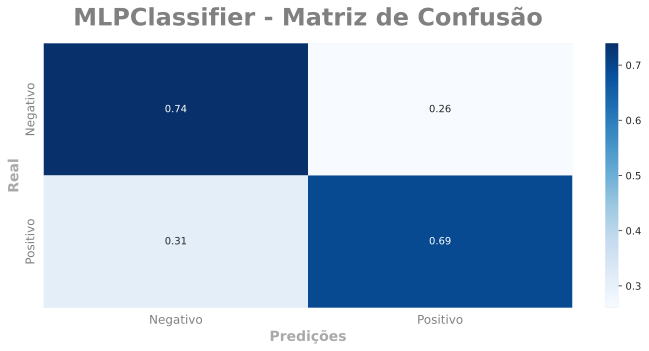

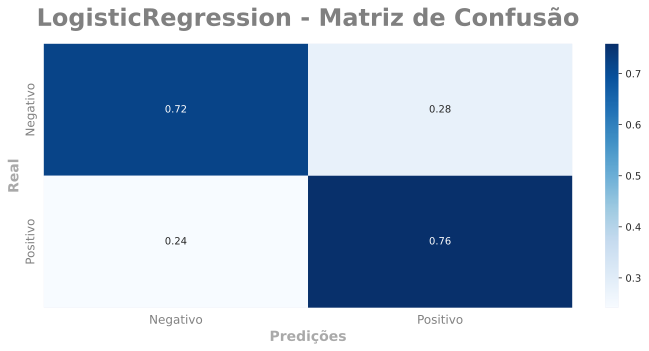

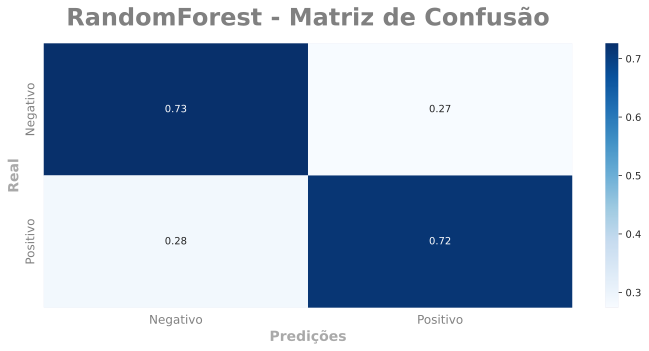

In [185]:
# 37 - Visualização da matriz de confusão de cada modelo
for name, pipeline in model_pipelines.items():

  # Após a validação cruzada, ajustamos o modelo com o conjunto de treino completo
  pipeline.fit(X_train, y_train)

  # Fazendo previsões no conjunto de validação
  y_pred = pipeline.predict(X_valid)

  # Gerando a matriz de confusão
  cm = confusion_matrix(y_valid, y_pred, normalize = "true")

  # Plotando a matriz de confusão
  fig, ax = plt.subplots(figsize = (10, 5), dpi = 200)
  ax = sns.heatmap(cm, annot = True, fmt = ".2f", cmap = "Blues",
                  xticklabels=["Negativo", "Positivo"],
                  yticklabels=["Negativo", "Positivo"])
  ax.set_title(f"{name} - Matriz de Confusão", color = "grey", fontsize = 24, fontweight = "bold", pad = 18)
  ax.set_xlabel("Predições", color = "darkgrey", fontsize = 14, fontweight = "semibold")
  ax.tick_params(axis = "x", labelsize = 12, colors = "grey")
  ax.set_ylabel("Real", color = "darkgrey", fontsize = 14, fontweight = "semibold")
  ax.tick_params(axis = "y", labelsize = 12, colors = "grey")
  plt.tight_layout()
  print()
  print()

#### Após verificar os resultados iniciais da base de **treino**, podemos escolher um modelo para configurar seus **hiperparâmetros** para finalmente aplicá-lo na base de **teste**. Arbitrariamente, selecionaremos o modelo **random forest**. Iremos configurar alguns de seus parâmetros.

In [186]:
# 38 - Configurando o parâmetro n_estimators
param_grid_1 = {
    "classifier__n_estimators": [50, 100, 150, 200]
}

grid_search_1 = GridSearchCV(
    model_pipelines["RandomForest"],
    param_grid_1,
    cv = 5,
    scoring = "recall",
    n_jobs = -1,
    verbose = 2
)

grid_search_1.fit(X_train, y_train)

best_n_estimators = grid_search_1.best_params_["classifier__n_estimators"]
print(f"Melhor n_estimators: {best_n_estimators}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhor n_estimators: 100


In [187]:
# 39 - Configurando o parâmetro max_depth
param_grid_2 = {
    "classifier__max_depth": [5, 10, 20, 30]
}

pipeline_rf = model_pipelines["RandomForest"]
pipeline_rf.set_params(classifier__n_estimators = best_n_estimators)

grid_search_2 = GridSearchCV(
    pipeline_rf,
    param_grid_2,
    cv = 5,
    scoring = "recall",
    n_jobs = -1,
    verbose = 2
)

grid_search_2.fit(X_train, y_train)

best_max_depth = grid_search_2.best_params_["classifier__max_depth"]
print(f"Melhor max_depth: {best_max_depth}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhor max_depth: 5


In [188]:
# 40 - Configurando o parâmetro min_samples_split
param_grid_3 = {
    "classifier__min_samples_split": [2, 5, 10]
}

pipeline_rf.set_params(
    classifier__n_estimators = best_n_estimators,
    classifier__max_depth = best_max_depth
)

grid_search_3 = GridSearchCV(
    pipeline_rf,
    param_grid_3,
    cv = 5,
    scoring = "recall",
    n_jobs = -1,
    verbose = 2
)

grid_search_3.fit(X_train, y_train)

best_min_samples_split = grid_search_3.best_params_["classifier__min_samples_split"]
print(f"Melhor min_samples_split: {best_min_samples_split}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhor min_samples_split: 5


In [189]:
# 41 - Configurando o min_samples_leaf
param_grid_4 = {
    "classifier__min_samples_leaf": [1, 2, 4]
}

pipeline_rf.set_params(
    classifier__n_estimators = best_n_estimators,
    classifier__max_depth = best_max_depth,
    classifier__min_samples_split = best_min_samples_split
)

grid_search_4 = GridSearchCV(
    pipeline_rf,
    param_grid_4,
    cv = 5,
    scoring = "recall",
    n_jobs=-1,
    verbose=2
)

grid_search_4.fit(X_train, y_train)

best_min_samples_leaf = grid_search_4.best_params_["classifier__min_samples_leaf"]
print(f"Melhor min_samples_leaf: {best_min_samples_leaf}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhor min_samples_leaf: 1


In [190]:
# 42 - Configurando o max_features
param_grid_5 = {
    "classifier__max_features": ["sqrt", "log2"]
}

pipeline_rf.set_params(
    classifier__n_estimators = best_n_estimators,
    classifier__max_depth = best_max_depth,
    classifier__min_samples_split = best_min_samples_split,
    classifier__min_samples_leaf = best_min_samples_leaf
)

grid_search_5 = GridSearchCV(
    pipeline_rf,
    param_grid_5,
    cv = 5,
    scoring = "recall",
    n_jobs = -1,
    verbose = 2
)

grid_search_5.fit(X_train, y_train)

best_max_features = grid_search_5.best_params_["classifier__max_features"]
print(f"Melhor max_features: {best_max_features}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Melhor max_features: log2


In [191]:
# 43 - Configurando o class_weight
param_grid_6 = {
    "classifier__class_weight": [None, "balanced"]
}

pipeline_rf.set_params(
    classifier__n_estimators = best_n_estimators,
    classifier__max_depth = best_max_depth,
    classifier__min_samples_split = best_min_samples_split,
    classifier__min_samples_leaf = best_min_samples_leaf,
    classifier__max_features = best_max_features
)

grid_search_6 = GridSearchCV(
    pipeline_rf,
    param_grid_6,
    cv=5,
    scoring="recall",
    n_jobs=-1,
    verbose=2
)

grid_search_6.fit(X_train, y_train)

best_class_weight = grid_search_6.best_params_["classifier__class_weight"]
print(f"Melhor class_weight: {best_class_weight}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Melhor class_weight: None


In [192]:
# 44 - Configurando o random forest com os melhores parâmetros
best_rf = RandomForestClassifier(
    n_estimators = best_n_estimators,
    max_depth = best_max_depth,
    min_samples_split = best_min_samples_split,
    min_samples_leaf = best_min_samples_leaf,
    max_features = best_max_features,
    class_weight = best_class_weight,
    random_state = 42
)

# Criando o pipeline final
final_pipeline = ImbPipeline([
    ("preprocessor", preprocessor_standard),
    ("rus", RandomUnderSampler(random_state = 42)),
    ("classifier", best_rf)
])

# Treinando o modelo final
final_pipeline.fit(X_train, y_train)

# Fazendo previsões
y_pred_valid = final_pipeline.predict(X_valid)

# Exibindo métricas
print("Avaliação na base de treino:")
print(classification_report(y_valid, y_pred_valid))

Avaliação na base de treino:
              precision    recall  f1-score   support

           0       0.90      0.70      0.78       825
           1       0.49      0.78      0.60       302

    accuracy                           0.72      1127
   macro avg       0.69      0.74      0.69      1127
weighted avg       0.79      0.72      0.73      1127



#### Uma vez que o modelo de machine learning está configurado com os **melhores parâmetros**, podemos **testá-lo** na **base de teste**.

In [193]:
# 45 - Treinamento Final e Avaliação na Base de Teste
y_pred_test = final_pipeline.predict(X_test)

print("Avaliação na Base de Teste")
print(classification_report(y_test, y_pred_test))

Avaliação na Base de Teste
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1052
           1       0.48      0.78      0.60       357

    accuracy                           0.73      1409
   macro avg       0.69      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409



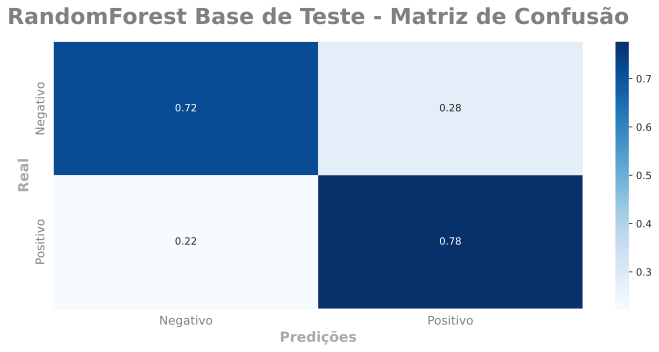

In [194]:
# 46 - Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_test, normalize = "true")

# Exibindo a matriz de confusão
fig, ax = plt.subplots(figsize = (10, 5), dpi = 200)
ax = sns.heatmap(cm, annot = True, fmt = ".2f", cmap = "Blues",
                    xticklabels=["Negativo", "Positivo"],
                    yticklabels=["Negativo", "Positivo"])
ax.set_title(f"{name} Base de Teste - Matriz de Confusão", color = "grey",
             fontsize = 22, fontweight = "bold", pad = 18)
ax.set_xlabel("Predições", color = "darkgrey", fontsize = 14, fontweight = "semibold")
ax.tick_params(axis = "x", labelsize = 12, colors = "grey")
ax.set_ylabel("Real", color = "darkgrey", fontsize = 14, fontweight = "semibold")
ax.tick_params(axis = "y", labelsize = 12, colors = "grey")
plt.tight_layout()

### Concluindo
* **Resultado** - o algoritmo obteve uma boa resposta quanto ao seu resultado na base de **teste**, acertando **78 %** dos clientes que realizaram o **churn**, ou seja, que de fato **saíram** da empresa, e **72 %** dos clientes que **ficaram** na empresa. Portanto, um resultado equilibrado, uma vez que na base de **treino** os números foram **78%** e **70 %**, respectivamente.

* **Base de dados** - infelizmente faltou a **documentação** para nos dar informações mais assertivas sobre os **conteúdos das colunas**, ainda que a maioria delas seja de fácil compreensão. Contudo, nem por isso deixa de ser um trabalho muito interessante que aborda um tema extremamente **relevante** para o mercado de prestação de serviços via assinaturas.

* **EDA** - durante a fase de **exploração e tratamento** dos dados pudemos observar que apesar da prévia informação de que não haviam **valores nulos**, eles acabaram aparecendo em outro momento, e foi preciso um olhar mais crítico, tanto para a percepção, quanto seu tratamento. A questão das **colunas binárias** também merece destaque no processo de tratamento. As visualizações seguiram o padrão com as **distribuições**. Vale mencionar a ausência das **correlações**, justificadas pela maioria de **colunas categóricas**.

* **Algoritmos** - a escolha dos modelos de **classificadores** não seguiu nenhum critério técnico, podendo por assim dizer, ter partido de minha escolha pessoal. Foram utilizadas as técnicas de **padronização, normalização, balanceamento e validação cruzada**.

* **Grid Search** - foi utilizada a técnica de escolha dos **melhores parâmetros**, para o algoritmo **random forest**, para a métrica **recall**. Os ajustes foram realizados em **6** parâmetros.

* **Métrica** - Para o tema **churn** a métrica **recall** entrega valores importantes uma vez que aponta para a **proporção de acertos** dentro dos **positivos reais**, ou seja, a coluna dos verdadeiros positivos e falsos negativos (**TP/TP+FN**).

* **Churn** - o tema é extremamente relevante para o mercado de prestação de serviços de assinaturas, onde as empresas devem olhar com muito zêlo para sua base de dados para ter a percepção de quando um cliente pode dar indícios de insatisfação e possível saída com seu cancelamento. Conforme mencionado, a forma **mensal de contratação** é a mais impactada dos três modelos, com mais de **88%** dos cancelamentos. Seria prudente conter mais indicadores como por exemplo **nível de satisfação, concorrência, precificação e descontos** para a atuação da equipe de **retenção** da empresa.


* **Síntese** - Apesar de alguns **dados técnicos** trata-se de uma **análise inicial** focada na apresentação de **modelos de machine learning** que possam justificar aos **tomadores de decisão** as medidas diante das porcentagens de acerto nos resultados de **Churn**, bem como uma atuação mais assertiva no **produto mensal**. Este projeto pode ser utilizado como base para expansão do tema.

#### Caso tenha interesse em analisar outros projetos fique à vontade acessando diretamente meu [GitHub](https://github.com/wallacecarlis/data_science) e [Medium](https://wallacecarlis.medium.com/), ou ainda meu [Site](https://www.wallacecarlis.com/).
#### Todo feedback será bem-vindo, abs!